In [2]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

---

# Real

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks90 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 5
map_pix = actmap

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks150 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks220 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks100 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks143 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/awd.csv', skiprows = 0)
zs = [0, 0.32, 100]
rhs = [0, 27, 100000]

stacks217 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks217.append(stack_CMB_kSZ[0])

In [ ]:
awd

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
zs = [1, 100]
rhs = [0, 100000]

stacks353 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
                decs = awd[(awd.z<zs[j]) & (awd.z>0) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
            decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacks545 = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/wh22.csv', skiprows = 0)
awd = awd[awd.z>=1]
zs = [1, 100]
rhs = [0, 100000]

stacks857 = []
lens = []
riches = []
reds = []
# for j in range(len(zs)):
#     for k in range(len(rhs)):
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
#         riches.append(rhs[k])
#         reds.append(zs[j])
#         if j == len(zs)-1:
#             if k == len(rhs)-1:
#                 print(zs[j],0)
#                 print(rhs[k],0)
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#             else:
#                 print(zs[j],0)
#                 print(rhs[k+1],rhs[k])
#                 ras = awd['ra'].reset_index(drop=True)
#                 decs = awd['dec'].reset_index(drop=True)
#         elif k == len(rhs)-1:
#             print(zs[j+1],zs[j])
#             print(rhs[k],0)
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k]) & (awd.m>0)]['dec'].reset_index(drop=True)
#         else:
#             print(zs[j+1],zs[j])
#             print(rhs[k+1],rhs[k])
#             ras = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['ra'].reset_index(drop=True)
#             decs = awd[(awd.z<zs[j+1]) & (awd.z>zs[j]) & (awd.m<rhs[k+1]) & (awd.m>rhs[k])]['dec'].reset_index(drop=True)

ras = awd['ra'].reset_index(drop=True)
decs = awd['dec'].reset_index(drop=True)

N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/ard_not_adv.csv', skiprows = 0)
zs = [0, 100]
rhs = [0, 100000]

stacksros = []
lens = []
riches = []
reds = []
for j in range(len(zs)):
    for k in range(len(rhs)):
        stack_CMB_kSZ           = 0
        stack_CMB_kSZ_deproject = 0
        c = 0
        riches.append(rhs[k])
        reds.append(zs[j])
        if j == len(zs)-1:
            if k == len(rhs)-1:
                print(zs[j],0)
                print(rhs[k],0)
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
            else:
                print(zs[j],0)
                print(rhs[k+1],rhs[k])
                ras = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
                decs = awd[(awd.amf_z<zs[j]) & (awd.amf_z>0) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)
        elif k == len(rhs)-1:
            print(zs[j+1],zs[j])
            print(rhs[k],0)
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k]) & (awd.amf_rh>0)]['amf_dec'].reset_index(drop=True)
        else:
            print(zs[j+1],zs[j])
            print(rhs[k+1],rhs[k])
            ras = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_ra'].reset_index(drop=True)
            decs = awd[(awd.amf_z<zs[j+1]) & (awd.amf_z>zs[j]) & (awd.amf_rh<rhs[k+1]) & (awd.amf_rh>rhs[k])]['amf_dec'].reset_index(drop=True)

        N = len(ras)
        lens.append(N)

        for i in tqdm(range(N)):
            stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

            if stamp is None:
                continue
            elif stamp[0][0][0]==0.0:
                continue

            stack_CMB_kSZ += stamp
            c += 1

        stack_CMB_kSZ /= c
        stack_CMB_kSZ_deproject /= c

        stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Non-clusters

## ACT

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks90 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks90.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks150 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks150.append(stack_CMB_kSZ[0])

In [ ]:
actmap = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")
windowlen = 1.8
map_pix = actmap

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks220 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks220.append(stack_CMB_kSZ[0])

## Planck

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks100 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks100.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks143 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks143.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks217 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks217.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks353 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks353.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks545 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks545.append(stack_CMB_kSZ[0])

In [ ]:
pl = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")
pl[pl<-1e23]=0
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(pl,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacks857 = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacks857.append(stack_CMB_kSZ[0])

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

awd = pd.read_csv('data/voids.csv', skiprows = 0)
stacksros = []
lens = []

stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0
ras = awd.ras
decs = awd.decs
N = len(ras)
lens.append(N)

for i in tqdm(range(N)):
    stamp = reproject.thumbnails(map_pix,coords = np.deg2rad([decs[i], ras[i]]),r=windowlen*utils.arcmin)

    if stamp is None:
        continue
    elif stamp[0][0][0]==0.0:
        continue

    stack_CMB_kSZ += stamp
    c += 1

stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

stacksros.append(stack_CMB_kSZ[0])

---

---

---

---

# Real

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
i = 0

for j,row in enumerate(ax):
    for k, col in enumerate(row):
        f1 = col.imshow(stacks220[i])
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        plt.colorbar(mappable = f1, ax = col,orientation='horizontal',fraction=0.047, pad=0.02)
        scalebar = AnchoredSizeBar(ax[0][0].transData,
                                   4.4, '', 'center left', 
                                   pad=0.,
                                   sep=-7,
                                   color='white',
                                   frameon=False,
                                   size_vertical=0.02)
        ax[0][0].add_artist(scalebar)
        ax[0][0].text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax[0][0].transAxes)

        col.text(0.3,0.5,"N={}".format(lens[i]),color='red')
        if j==0 and k==0:
            col.text(-5,4.2,"z<0.32",size=20)
        if j==1 and k==0:
            col.text(-5,4.2,"z>0.32",size=20)
        if j==2 and k==0:
            col.text(-5,4.2,"All z",size=20)
        if k==0 and j==0:
            col.text(3,-3,"rh<27",size=20)
        if k==1 and j==0:
            col.text(3,-3,"rh>27",size=20)
        if k==2 and j==0:
            col.text(3,-3,"All rh",size=20)

        i+=1

plt.savefig("output/stacks220_zoom.png")
plt.show()

---

# Non-clusters

In [ ]:
font_path = 'data/cmunrm.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

f, ax = plt.subplots(figsize=(5,5))
i = 0

f1 = ax.imshow(stacksros[i])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.colorbar(mappable = f1, ax = ax,orientation='horizontal',fraction=0.047, pad=0.02)
scalebar = AnchoredSizeBar(ax.transData,
                           4.4, '', 'center left', 
                           pad=0.,
                           sep=-7,
                           color='white',
                           frameon=False,
                           size_vertical=0.02)
# ax.add_artist(scalebar)
# ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c='white', fontsize=18, transform=ax.transAxes)

# ax.text(0.2,.7,"N={}".format(lens[i]),color='white',fontsize=20)
ax.text(0.2,7.8,"ROSAT".format(lens[i]),color='white',fontsize=20)

i+=1

plt.savefig("output/stacksros.png")
plt.show()

## NEW Work ##

In [ ]:
# Copied imports from above

import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import time
import sys
from pixell import enmap, enplot, reproject, utils, curvedsky, wcsutils
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.linalg import sqrtm
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import pandas as pd
from matplotlib import font_manager

In [ ]:

# Task 2 - Map of sky in a certain area

# TO get void locations
# awd = pd.read_csv("data/voids.csv", skiprows = 0).rename(columns = {"ras":"amf_ra", "decs":"amf_dec"})

# TO get ALL cluster locations (union3)
awd = pd.read_csv("data/union3.csv", skiprows = 0)

In [ ]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

# 1)  z > 1, Zou HSC
awd[(awd.z > 1) & (awd.cat == 3)]

In [ ]:
# 2)  z > 1, WH22

awd[(awd.z > 1) & (awd.cat == 4)]

In [ ]:
# 3)  0.6 < z < 1, Zou DESI

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat == 2)]

In [ ]:
# 4)  0.6 < z < 1, Zou DES + WH22 
# DES alone doesn't have enough

awd[(awd.z < 1) & (awd.z > 0.6) & (awd.cat.isin([1, 4]))]

In [ ]:
# 5)  0.05 < z < 0.6, AMF + WH22

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat.isin([0, 4]))]

In [ ]:
# 6)  0.05 < z < 0.6, Zou DESI

awd[(awd.z < 0.6) & (awd.z > 0.05) & (awd.cat == 2)]

In [ ]:
# Vertical
ver = (((90*60)/10)*(5/6))-1
ver

In [ ]:
# Horiztonal
hor = (180*60)/10-1
hor

In [ ]:
ver * hor

In [ ]:
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy import units as u
from tqdm import tqdm

# galactic coordinates
glon = []
glat = []
for lon in tqdm(np.linspace(180,360,1079)):
    for lat in np.linspace(15,90,449):
        if (lat >= -15) & (lat <= 15):
            continue
        glon.append(lon)
        glat.append(lat)
glon2 = [i*u.degree for i in glon]
glat2 = [i*u.degree for i in glat]

# convert to equitorial coordinates
c = SkyCoord(glon2, glat2, frame='galactic')
ras = c.icrs.ra.deg
decs = c.icrs.dec.deg

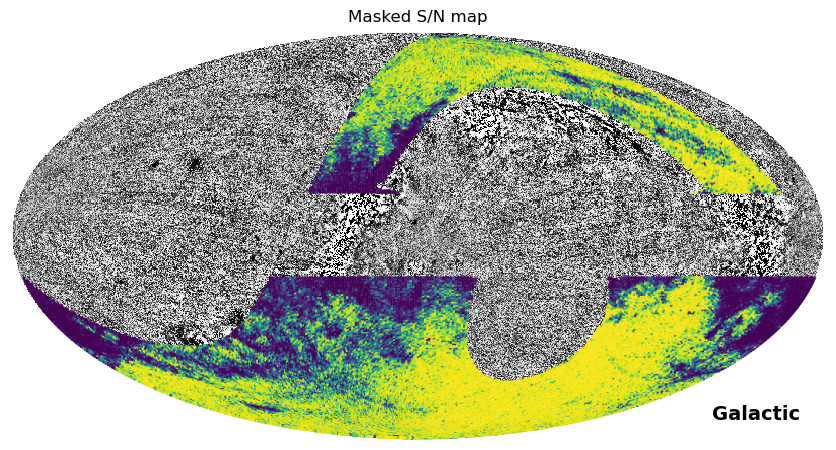

In [45]:
# Algorithm Results

cluster_map = pd.read_csv("output/Locations/C2_wA/random_scan_fs.csv")
# cluster_map = cluster_map[cluster_map["clusterp"] > 0.85]

import healpy as hp
pl143 = hp.read_map('data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
hp.mollview(pl143,norm='hist',cmap='Greys',title='Masked S/N map',cbar=False, coord = ["C", "G"])
#hp.visufunc.projscatter(glon,glat,lonlat=True)#,c=countfs,s=10,vmin=0, vmax=1)
hp.visufunc.projscatter(cluster_map['glon'],cluster_map['glat'],lonlat=True,c=cluster_map['clusterp'],s=1,vmin=0, vmax=1)

## Comparisons ##

In [22]:
total = pd.read_csv("data/union3.csv")

zou_des = total[total.cat == 1]
wh22 = total[total.cat == 4]


total = 
zou_des

,amf_ra,amf_dec,z,rh,cat
46479,1.471701,4.864279,1.149337,87.404965,1
46480,1.541611,4.989197,0.209711,34.963160,1
46481,1.550453,4.979210,0.447603,38.480705,1
46482,0.790352,5.325782,0.245052,112.881846,1
46483,1.714827,5.312761,0.673002,172.958085,1
...,...,...,...,...,...
133437,58.766038,-67.088373,0.700890,65.753062,1
133438,61.617819,-67.018588,0.590934,197.239876,1
133439,61.925930,-67.139741,0.665781,46.894161,1
133440,61.914463,-66.800340,0.545805,133.020024,1


In [23]:
wh22

,amf_ra,amf_dec,z,rh,cat
702818,0.00200,2.31979,0.4192,18.77,4
702819,0.00555,-64.16639,0.6423,36.48,4
702820,0.00563,-52.33236,0.5829,21.61,4
702821,0.00943,-47.85358,0.7734,17.47,4
702822,0.01186,-47.73740,0.3169,17.18,4
...,...,...,...,...,...
854057,359.98911,-6.40920,1.0678,68.50,4
854058,359.99091,-44.66209,0.7684,16.34,4
854059,359.99377,-49.09889,0.6708,21.85,4
854060,359.99503,-37.71075,0.6743,45.15,4


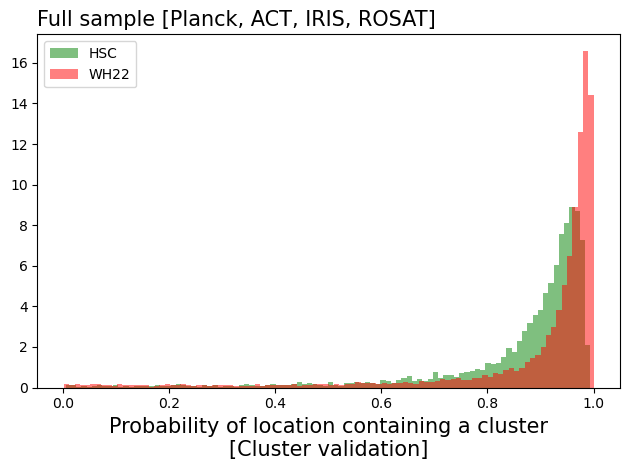

In [3]:
compare1 = pd.read_csv("output/Locations/C1_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C2_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.5, density = True, label = "HSC")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.5, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

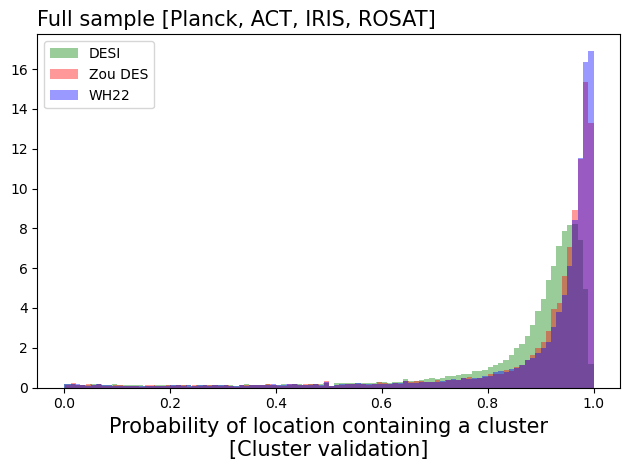

In [5]:
compare1 = pd.read_csv("output/Locations/C3_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C4_wA/cluster_validation.csv")
compare3 = pd.read_csv("output/Locations/C5_wA/cluster_validation.csv")

plt.hist(compare1["clusterp"],bins=100, color = "green", alpha = 0.4, density = True, label = "DESI")
plt.hist(compare2["clusterp"],bins=100, color = "red", alpha = 0.4, density = True, label = "Zou DES")
plt.hist(compare3["clusterp"],bins=100, color = "blue", alpha = 0.4, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()


In [ ]:
print(len(compare1["clusterp"] > 0.8))
print(len(compare2["clusterp"] > 0.8))
print(len(compare3["clusterp"] > 0.8))

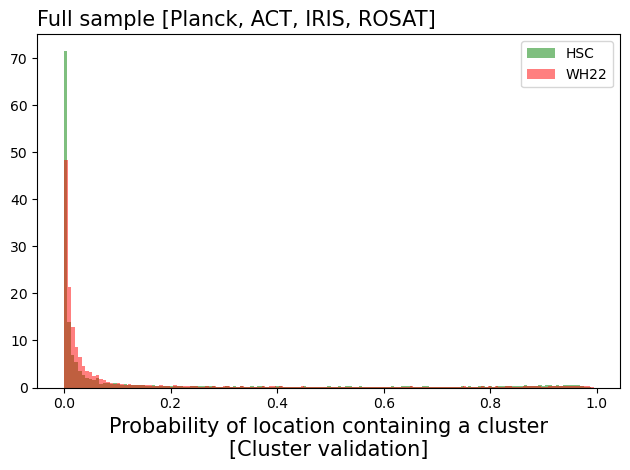

In [6]:
# Making comparisons for the other redshift categories, and mass cuts

compare1 = pd.read_csv("output/Locations/C1_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C2_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.5, density = True, label = "HSC")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.5, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

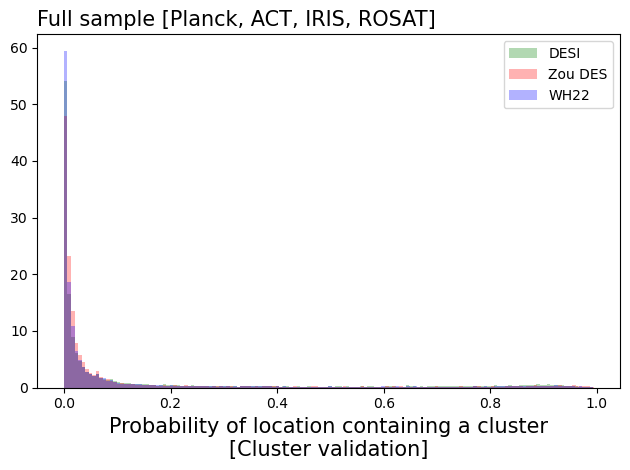

In [10]:
compare1 = pd.read_csv("output/Locations/C3_wA/noncluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C4_wA/noncluster_validation.csv")
compare3 = pd.read_csv("output/Locations/C5_wA/noncluster_validation.csv")

plt.hist(compare1["clusterp"],bins=150, color = "green", alpha = 0.3, density = True, label = "DESI")
plt.hist(compare2["clusterp"],bins=150, color = "red", alpha = 0.3, density = True, label = "Zou DES")
plt.hist(compare3["clusterp"],bins=150, color = "blue", alpha = 0.3, density = True, label = "WH22")

plt.legend()
plt.xlabel('Probability of location containing a cluster\n[Cluster validation]',size=15)
plt.title('Full sample [Planck, ACT, IRIS, ROSAT]',loc='left',size=15)
# plt.axvline(0.99,c='r')
plt.tight_layout()
# plt.savefig('c_full.png',dpi=1000)
plt.show()

In [10]:
compare1 = pd.read_csv("output/Locations/C4_wA/cluster_validation.csv")
compare2 = pd.read_csv("output/Locations/C5_wA/Q1_scan_fs.csv")

In [11]:
compare2

,glat,glon,i100,i143,i217,i353,i545,i857,i090,i150,...,i090_r,i150_r,i220_r,iros_r,i12_r,i25_r,i60_r,i1002_r,cluster,clusterp
0,15.000000,195.695733,0.000098,0.000132,0.000273,0.001310,-0.007371,-0.020622,37.227936,28.236802,...,32.722019,14.602172,209.333175,0.000133,0.346526,0.769101,0.199784,3.484473,2,0.969339
1,15.336323,195.695733,0.000081,0.000083,0.000216,0.001176,-0.115593,-0.335291,0.001539,36.667584,...,4.265996,14.576886,-223.638739,0.000209,0.415104,0.866474,0.227723,3.479162,2,0.710636
2,15.000000,196.029685,0.000079,0.000121,0.000247,0.001259,-0.097560,-0.261208,-0.204080,-6.530554,...,18.593406,1.505481,209.333175,0.000347,0.285754,0.731004,0.262910,3.620663,2,0.818508
3,15.336323,196.029685,0.000013,0.000040,0.000166,0.001334,0.019610,0.074043,-7.433364,8.769911,...,-8.274808,9.419810,-229.156570,0.000295,0.254808,0.792534,0.241049,3.506436,2,0.994489
4,15.672646,196.029685,-0.000092,-0.000037,0.000095,0.001250,0.039942,0.173470,2.070509,21.326772,...,4.255073,37.243579,128.840430,0.000081,0.305881,0.897821,0.277118,3.602831,2,0.995177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18466,79.573991,360.000000,-0.000084,-0.000057,0.000014,0.000526,-0.001349,-0.006635,-30.575641,24.548773,...,-9.798715,33.235041,125.934944,0.000271,1.059998,2.100156,0.636301,1.871298,2,0.981083
18467,79.910314,360.000000,0.000028,0.000033,0.000089,0.000652,0.035175,0.095556,-73.184314,-101.471391,...,-23.404777,-45.592403,41.870000,0.000135,1.015023,1.969349,0.636037,1.849960,2,0.964194
18468,80.246637,360.000000,0.000036,0.000048,0.000104,0.000660,-0.020511,-0.021805,61.277768,-9.568969,...,44.078554,-1.236113,2.815831,0.000059,1.098038,2.139415,0.666745,2.031501,2,0.910871
18469,80.582960,360.000000,-0.000113,-0.000107,-0.000046,0.000599,-0.010248,-0.022400,-36.553273,-20.558659,...,-3.408248,-5.799250,-98.028293,0.000441,1.112982,2.213387,0.668629,2.011491,2,0.966663


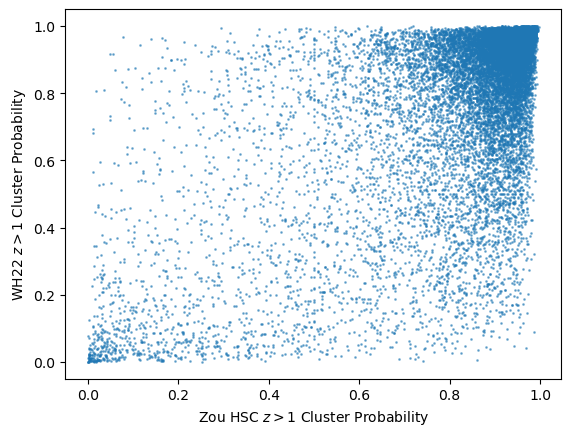

In [12]:
# Cross-matching
# $0.6<z<1$, $z>1$, $0.05<z<0.6$

# Assuming locations (glat, glon) have not been switched up (same order as original dataframe)

plt.scatter(compare1["clusterp"], compare2["clusterp"], s = 1, alpha = 0.5)
plt.xlabel("Zou HSC $z>1$ Cluster Probability")
plt.ylabel("WH22 $z>1$ Cluster Probability")
plt.show()

## Planck Plotting - All Freq. ##

In [ ]:
glat = 0
glon = 0

c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
ra = c.icrs.ra.deg
dec = c.icrs.dec.deg

(ra, dec)

In [ ]:
# For the 100 GHz frequency sample
awd = pd.read_csv("data/union3.csv", skiprows = 0)

pl100 = hp.read_map("data/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits")
pl143 = hp.read_map("data/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits")
pl217 = hp.read_map("data/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits")
pl353 = hp.read_map("data/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits")
pl545 = hp.read_map("data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits")
pl857 = hp.read_map("data/HFI_SkyMap_857-field-Int_2048_R3.00_full.fits")

windowlen = 10
pl100[pl100<-1e23]=0
pl143[pl143<-1e23]=0
pl217[pl217<-1e23]=0
pl353[pl353<-1e23]=0
pl545[pl545<-1e23]=0
pl857[pl857<-1e23]=0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix_pl = list()
map_pix_pl.append(reproject.enmap_from_healpix(pl100, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl143, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl217, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl353, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl545, shape = shape, wcs = wcs))
map_pix_pl.append(reproject.enmap_from_healpix(pl857, shape = shape, wcs = wcs))

In [ ]:
# Plotting Planck Images at all Planck Frequencies around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30
planck_map_freq = [100, 143, 217, 353, 545, 857]

fig, ax = plt.subplots(2, 3, figsize=(12,8))
j = 0
for i in range(len(map_pix_pl)):
    a = i
    stamp = reproject.thumbnails(map_pix_pl[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 3:
        a -= 3
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("Planck " + str(planck_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## ACT ##

In [ ]:
# For ACT frequency samples

act_90 = enmap.read_map("data/act_dr5.01_s08s18_AA_f090_daynight_map.fits")
act_150 = enmap.read_map("data/act_dr5.01_s08s18_AA_f150_daynight_map.fits")
act_220 = enmap.read_map("data/act_dr5.01_s08s18_AA_f220_daynight_map.fits")

windowlen = 1.8

map_pix_act = list()
map_pix_act.append(act_90)
map_pix_act.append(act_150)
map_pix_act.append(act_220)


In [ ]:
# Plotting ACT Images at all ACT Frequencies around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30
act_map_freq = [90, 150, 220]

fig, ax = plt.subplots(1, 3, figsize=(12,8))
for i in range(len(map_pix_act)):
    stamp = reproject.thumbnails(map_pix_act[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    f1 = ax[i].imshow(stamp[0]) 
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title("ACT " + str(act_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[i], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[i].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## ROSAT ##

In [ ]:
ros = hp.read_map("data/rass_healpix_countsec.fits")
mask = hp.read_map("data/mask_comprass.fits")
ros[ros<-1e23]=0
masked_ros = []
for i in tqdm(range(len(mask))):
    masked_ros.append(0)
    if mask[i]:
        masked_ros[i]=ros[i]
masked_ros = np.array(masked_ros)
windowlen = 10

shape,wcs = enmap.fullsky_geometry(res=5.0 * utils.arcmin,proj='car')
map_pix_ros = reproject.enmap_from_healpix(masked_ros,shape=shape,wcs=wcs)

In [ ]:
# Plotting ROSAT Images around an RA and DEC

# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30

fig, ax = plt.subplots(1, 1)
stamp = reproject.thumbnails(map_pix_ros, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
f1 = ax.imshow(stamp[0]) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title("ROSAT")
c_bar = plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
c_bar.ax.locator_params(nbins=3)
scalebar = AnchoredSizeBar(ax.transData,
                          4.4, "", "center left",
                          pad = 0,
                          sep = 7,
                          color = "white",
                          frameon = False,
                          size_vertical = 0.02)
fig.subplots_adjust(wspace=0.2, hspace = 0.3)
plt.show()

## IRIS ##

In [ ]:
# For IRIS frequency Samples (if we ever need it for some reason)

ir12 = hp.read_map("data/IRIS_nohole_1_2048_v2.fits")
ir25 = hp.read_map("data/IRIS_nohole_2_2048_v2.fits")
ir60 = hp.read_map("data/IRIS_nohole_3_2048_v2.fits")
ir100 = hp.read_map("data/IRIS_nohole_4_2048_v2.fits")

windowlen = 10
ir12[(ir12==-32768) | np.isnan(ir12)] = 0
ir25[(ir25==-32768) | np.isnan(ir25)] = 0
ir60[(ir60==-32768) | np.isnan(ir60)] = 0
ir100[(ir100==-32768) | np.isnan(ir100)] = 0

# Create a full sky Cartesian geometry with resolution 5 arcmin / pixel
# Returns a shape and a world coordinate system?
shape, wcs = enmap.fullsky_geometry(res = 5.0*utils.arcmin, proj = "car")
map_pix_ir = list()
map_pix_ir.append(reproject.enmap_from_healpix(ir12, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir25, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir60, shape = shape, wcs = wcs))
map_pix_ir.append(reproject.enmap_from_healpix(ir100, shape = shape, wcs = wcs))

In [ ]:
# glat = -44.43037974683544
# glon = 126.45569620253166

# c = SkyCoord(glon, glat, frame='galactic', unit = 'deg')
# ra = c.icrs.ra.deg
# dec = c.icrs.dec.deg

ra = 146.075072
dec = 0.960983

windowlen = 30
iris_map_freq = [12, 25, 60, 100]

fig, ax = plt.subplots(2, 2, figsize=(8,8))
j = 0
for i in range(len(map_pix_ir)):
    a = i
    stamp = reproject.thumbnails(map_pix_ir[i], coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    if i >= 2:
        a -= 2
        j = 1
    f1 = ax[j,a].imshow(stamp[0]) 
    ax[j,a].get_xaxis().set_visible(False)
    ax[j,a].get_yaxis().set_visible(False)
    ax[j,a].set_title("IRIS " + str(iris_map_freq[i]))
    c_bar = plt.colorbar(mappable = f1, ax = ax[j,a], orientation = "horizontal", fraction = 0.047, pad = 0.02)
    c_bar.ax.locator_params(nbins=3)
    scalebar = AnchoredSizeBar(ax[j,a].transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
    fig.subplots_adjust(hspace = 0.3)
plt.show()

## Plotting

In [ ]:
# font_path = "data/cmunrm.ttf"
# font_manager.fontManager.addfont(font_path)
# prop = font_manager.FontProperties(fname = font_path)
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = prop.get_name()
# plt.rcParams["axes.unicode_minus"] = False

# 1. Different Training Sets
# 2. Viewing (next to each other)
# 3. Jiggling
# 4. Validation of catalogues

for i in range(len(awd.amf_ra.values)):
    dec = awd.amf_dec.values[i]
    ra = awd.amf_ra.values[i]
    
    # extract a set of thumbnail images centered on each set ofcoordinates 
    # (1 per for loop, in this case)
    stamp = reproject.thumbnails(map_pix, coords = np.deg2rad([dec, ra]), r = windowlen*utils.arcmin)
    
    f, ax = plt.subplots(figsize = (5, 5))
    
    # Display image as 2D raster (Matplotlib)
    f1 = ax.imshow(stamp[0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.colorbar(mappable = f1, ax = ax, orientation = "horizontal", fraction = 0.047, pad = 0.02)
    scalebar = AnchoredSizeBar(ax.transData,
                              4.4, "", "center left",
                              pad = 0,
                              sep = 7,
                              color = "white",
                              frameon = False,
                              size_vertical = 0.02)
#     ax.add_artist(scalebar)
#     ax.text(0.1, 0.4, 'R = 10$\,$\''.format(10), c= "white", fontsize = 18, transform = ax.transAxes)
    
#     ax.text(0.2, 0.7, "N={}".format(lens[i]), color = "white", fontsize = 20)
    # ax.text(0.2, 7.8, "ROSAT".format(lens[i]), color = "white", fontsize = 20)
    # plt.savefig("output/stackros.png")
    
    plt.show()
    
    

In [ ]:
# 

In [ ]:
# Categories
# 0 - AMF
# 1 - Zou subset DES
# 2 - Zou subset DESI
# 3 - Zou subset HSC
# 4 - WH22

## Some Samples ##

In [ ]:
awd = pd.read_csv("data/union3.csv", skiprows= 0)
awd

In [ ]:
# Catalogue 0 - AMF

awd0 = awd[awd["cat"] == 0]
fig = plt.hist2d(awd0["z"], awd0["rh"])
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 1 - Zou DES

awd1 = awd[awd["cat"] == 1]
fig = plt.hist2d(awd1["z"], awd1["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 2 - Zou DESI

awd2 = awd[awd["cat"] == 2]
fig = plt.hist2d(awd2["z"], awd2["rh"], bins = (100, 100))
plt.colorbar()
plt.show()

In [ ]:
# Catalogue 3 - Zou HSC

awd3 = awd[awd["cat"] == 3]
fig = plt.hist2d(awd3["z"], awd3["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Restrict richness to 1.5

# Richness is NOT the same thing across catalogues

# Title
# Integrated signal abov

In [ ]:
# Catalogue 4 - WH22

awd4 = awd[awd["cat"] == 4]
fig = plt.hist2d(awd4["z"], awd4["rh"])
plt.colorbar()
plt.show()

In [ ]:
# All Catalogues

fig = plt.hist2d(awd["z"], awd["rh"], bins = (100,100))
plt.colorbar()
plt.show()

In [ ]:
# Zou Catalogues only (1,2,3)

awd_Zou = awd[(awd["cat"] == 1) | (awd["cat"] == 2) | (awd["cat"] == 3)]
fig = plt.hist2d(awd_Zou["z"], awd_Zou["rh"], bins = (100,100))
plt.colorbar()
plt.show()

## Trying to Manually Find Cumulative Distribution Function - WH22

In [ ]:
catalogue = 0
z_lb = 0
z_hb = 5
rh_lb = 0
rh_hb = 50
bin_num = 20

cat_names = ["AMF", "Zou DES", "Zou DESI", "Zou HSC", "WH22"]

awd_cat = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]
plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")

plt.suptitle(cat_names[catalogue] + " Non-integrated Distribution", fontsize = 16)
plt.colorbar()
plt.show()

In [ ]:
# Understanding the "Integrated" code:

# Histdata is an array storing the histogram value (color) at each coordinate.
# xbins and ybins keep track of the bin edges along the axes
# mesh is irrelevant here
# Change number of bins here

hist_data, xbins, ybins, mesh = plt.hist2d(awd_cat["z"], awd_cat["rh"], bins = (bin_num, bin_num))

# Integrate this histogram data. 
# Pandas cumsum (different from np cumsum - look it up) over the data. axis = 0 is adding each row to the next one.
hist_data = hist_data.cumsum(axis = 0).cumsum(axis = 1)

# Matplotlib pcolormesh is used to plot a color map
plt.pcolormesh(xbins, ybins, hist_data)
plt.suptitle(cat_names[catalogue] + " Integrated Distribution", fontsize = 16)
plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)
plt.xlabel("Redshift, z")
plt.ylabel("Richness, rh")
plt.colorbar()
plt.show()

In [ ]:
# Lookup for objects in certain range:

catalogue = 3
z_lb = 1
z_hb = 5
rh_lb = 0
rh_hb = 500

awd_check = awd[(awd["cat"] == catalogue) & (awd["z"] >= z_lb) & (awd["z"] <= z_hb) 
               & (awd["rh"] >= rh_lb) & (awd["rh"] <= rh_hb)]

print("Size: " + str(len(awd_check)))

In [ ]:
# Using to find for other catalogues:

# Insert here

# How to find intersections? It seems like the union3 file, etc. was
# made such that duplicates from one catalogue were dropped?? idk

## Failed Attempts

In [ ]:
# Another Failed Attempt

# awd_WH22_int = awd_WH22.sort_values(by = "z")
# awd_WH22_int["z_cum"] = np.cumsum(awd_WH22_int["z"], axis = 0)
# awd_WH22_int["rh_cum"] = np.cumsum(awd_WH22_int["rh"], axis = 0)

# fig = plt.hist2d(awd_WH22_int["z_cum"], awd_WH22_int["rh_cum"], bins = (20,20))
# plt.suptitle("WH22 Integrated Distribution", fontsize = 16)
# plt.title("Between redshifts " + str(z_lb) + "$\leq$z$\leq$" + str(z_hb), fontsize = 12, x = 0.6)

# plt.colorbar()
# plt.show()